<a href="https://colab.research.google.com/github/AjayBandari1/Credit-Card-Fraud-Detection/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
df = pd.read_csv('/creditcard.csv')

# Data Exploration
print(df.head(5))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

<ipython-input-92-e56a7140b780>:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/creditcard.csv')


In [ ]:
#Data Exploration

#Data Information
print(df.info())

# Check class imbalance
print(df['Class'].value_counts(normalize=True) * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112983 entries, 0 to 112982
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    112983 non-null  int64  
 1   V1      112983 non-null  float64
 2   V2      112983 non-null  float64
 3   V3      112983 non-null  float64
 4   V4      112983 non-null  float64
 5   V5      112983 non-null  float64
 6   V6      112983 non-null  float64
 7   V7      112983 non-null  float64
 8   V8      112983 non-null  float64
 9   V9      112983 non-null  float64
 10  V10     112983 non-null  float64
 11  V11     112983 non-null  float64
 12  V12     112983 non-null  float64
 13  V13     112983 non-null  float64
 14  V14     112983 non-null  float64
 15  V15     112983 non-null  float64
 16  V16     112983 non-null  float64
 17  V17     112983 non-null  float64
 18  V18     112983 non-null  float64
 19  V19     112983 non-null  float64
 20  V20     112983 non-null  float64
 21  V21     11

In [ ]:
# Convert all object columns to numeric (handle categorical issues)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows that still contain NaN values after conversion
df = df.dropna()

<ipython-input-95-fb2a71028929>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


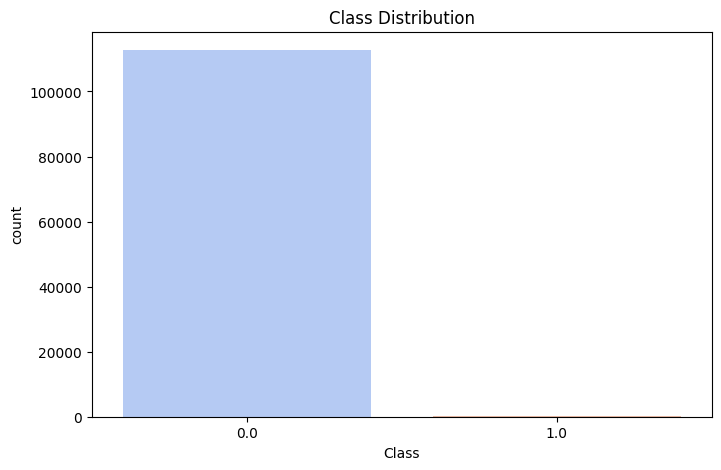

In [ ]:
# Data Visualization

plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title('Class Distribution')
plt.show()

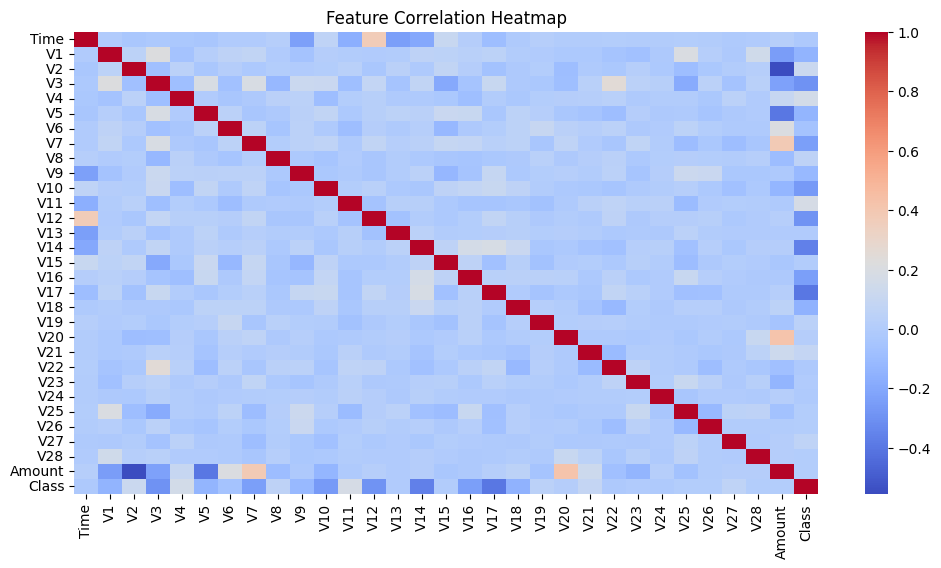

In [ ]:
#Correlation

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Standardize features

from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['number']).columns[:-1]
df[numerical_features] = Scaler.fit_transform(df[numerical_features])

In [ ]:
# Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Handle Class Imbalance using SMOTE

from imblearn.over_sampling import SMOTE

Smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = Smote.fit_resample(X_train, y_train)

In [ ]:
# Train and Evaluate Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

LOG_Model = LogisticRegression(solver='liblinear', random_state=42)
LOG_Model.fit(X_train_resampled, y_train_resampled)
y_pred_LOG = LOG_Model.predict(X_test)

ROC_AUC_LOG = roc_auc_score(y_test, y_pred_LOG)
Accuracy_LOG = accuracy_score(y_test, y_pred_LOG)
print("\nModel: LogisticRegression")
print(confusion_matrix(y_test, y_pred_LOG))
print(classification_report(y_test, y_pred_LOG))
print("ROC AUC Score:", ROC_AUC_LOG)
print("Accuracy:", Accuracy_LOG)


Model: LogisticRegression
[[22232   317]
 [    5    43]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     22549
         1.0       0.12      0.90      0.21        48

    accuracy                           0.99     22597
   macro avg       0.56      0.94      0.60     22597
weighted avg       1.00      0.99      0.99     22597

ROC AUC Score: 0.9408875301195915
Accuracy: 0.9857503208390495


In [ ]:
# Train and Evaluate XGBoost Model

from xgboost import XGBClassifier

XGB_Model = XGBClassifier(eval_metric='logloss', learning_rate=0.05, max_depth=6, n_estimators=300, subsample=0.8, colsample_bytree=0.8, random_state=42)
XGB_Model.fit(X_train_resampled, y_train_resampled)
y_pred_XGB = XGB_Model.predict(X_test)

ROC_AUC_XGB = roc_auc_score(y_test, y_pred_XGB)
Accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print("\nModel: XGBoostClassifier")
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))
print("ROC AUC Score:", ROC_AUC_XGB)
print("Accuracy:", Accuracy_XGB)


Model: XGBoostClassifier
[[22540     9]
 [    6    42]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22549
         1.0       0.82      0.88      0.85        48

    accuracy                           1.00     22597
   macro avg       0.91      0.94      0.92     22597
weighted avg       1.00      1.00      1.00     22597

ROC AUC Score: 0.9373004346090736
Accuracy: 0.999336195070142


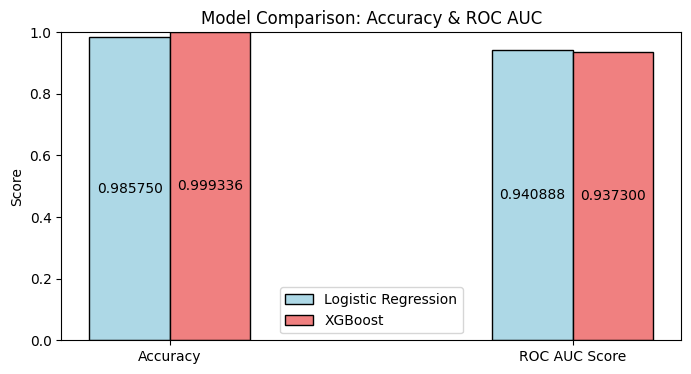

In [ ]:

# Visualizing Accuracies
metrics = ['Accuracy', 'ROC AUC Score']
log_values = [Accuracy_LOG, ROC_AUC_LOG]
xgb_values = [Accuracy_XGB, ROC_AUC_XGB]

x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(8, 4))
Bars1 = plt.bar(x - width/2, log_values, width, label='Logistic Regression', color='lightblue', edgecolor='black')
Bars2 = plt.bar(x + width/2, xgb_values, width, label='XGBoost', color='lightcoral', edgecolor='black')

plt.xticks(ticks=x, labels=metrics)
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy & ROC AUC')
plt.legend()
plt.ylim(0, 1)

# Add exact value annotations inside bars
for bar in Bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{bar.get_height():.6f}', ha='center', va='center', fontsize=10, color='black')
for bar in Bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{bar.get_height():.6f}', ha='center', va='center', fontsize=10, color='black')

plt.show()